# Exploratory Data Analysis of Kickstarter Project Data

**Description:**  
There’s a free dataset on Kaggle with Kickstarter project data from May 2009 to March 2018. Let's perform some EDA on the data (Exploratory Data Analysis) to gather any insights. In the future for a more challenging project, we can apply machine learning to the dataset to predict whether a project will succeed or not.

https://www.kaggle.com/kemical/kickstarter-projects

*Note: the dataset is in a zip file with 2 csv files in it: 2016 and 2018.  The data in both files is mostly the same but the 2016 one is older and uses a non-standard format, so for this let's just use the 2018 file only.*

**Questions to Answer:**  
1a. Examine the `state` column to see unique values and counts.  
1b. Show a pie chart of the `state` project count for all projects.  
1c. Create a new "Completed" dataframe that removes any rows with state of 'live', 'undefined', or suspended.  
*note - from here out we'll be looking at the completed project data unless mentioned otherwise*

2a. What is the overall success rate for all completed kickstarter projects?  
2b. Which 5 projects were pledged the most money (usd_pledged_real)?  
2c. Which 5 projects had the most backers?  
2d. Which year had the most competition? (# of projects)  

3a. What is the success rate for all projects broken down by `main_category`?  
3b. Show a horizontal bar chart for project success rate by `main_category`, sorted by highest to lowest.  
3c. Within the Games `main_category`, what is the success rate for each `category` within it?  

4a. Calculate the 'pct_of_goal' for each completed project.  
4b. What were the top 5 projects when looking at pct_of_goal for all time?  
4c. Plot a histogram distribution of all completed projects by pct_of_goal  
4d. Create 2 histogram subplots by pct_of_goal: 1) state=successful, and 2) all others (failed)  

5a. What is the average `usd_goal_real` for all *completed* kickstarter projects, broken down by `main_category`.  
5b. What is the median `usd_goal_real` for all *completed* kickstarter projects, broken down by `main_category`.  
5c. What is the average `usd_pledged_real` for all *completed* kickstarter projects, broken down by `main_category`.  
5d. What is the median `usd_pledged_real` for all *completed* kickstarter projects, broken down by `main_category`.  
5e. What insights does this information provide? (be creative)  
5f. Based on this information, if someone wanted to choose the `main_category` with the highest combined success rate and pledged dollar amount, which one would you recommend?  

6a. Create a new column 'months' that shows how many months the project was active between launch and deadline.  
6b. Compare the avg months for successful projects vs non-successful.  Add visuals if you'd like.  
6c. Does the length of a project in months seem to have an impact?  

*Let's zoom in on Games: Video Games (main_category: category)*

7a. Calculate the expected value for the Games: Video Games category, with the expected value defined as (median of usd_pledged_real)* (success rate of completed projects).  
7b. Do this again but broken down by deadline year  
7c. Show this in a bar chart  
7d. What insights does this data provide you?  

*Let's zoom in on personal planners*

8a. Calculate the count, success rate, and pct_of_goal for all projects with 'planner' in the name.  
8b. How about all projects with both 'planner' and 'Panda' in the name?  

*Bonus insights* - feel free to add any other interesting findings from the dataset here  

*Future ML project:* Given a sample kickstarter project, can you predict the usd_pledged_real, and whether it will be successful?  What features (data points) are most important in determining if a project will be successful or not?

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from datetime import datetime
from zipfile import ZipFile   # to unzip files pulled from Kaggle API

In [2]:
# Set the style for viz
plt.style.use('seaborn-deep')
sns.set_style('whitegrid')

## Download and Import the Data from Kaggle

In [3]:
# Kaggle API to pull the dataset files directly from their website

# uncomment below if you haven't installed the kaggle api
# !pip install kaggle

import kaggle

In [4]:
# Download the Kickstarter dataset
# Note that you'll need to have your Kaggle API key saved on your computer for this to work
!kaggle datasets download kemical/kickstarter-projects

kickstarter-projects.zip: Skipping, found more recently modified local copy (use --force to force download)


In [5]:
# files are compressed in a zip so use this to access them
zf = ZipFile('kickstarter-projects.zip')
zf.infolist()

[<ZipInfo filename='ks-projects-201612.csv' compress_type=deflate file_size=46500324 compress_size=17193872>,
 <ZipInfo filename='ks-projects-201801.csv' compress_type=deflate file_size=58030359 compress_size=21376870>]

In [6]:
# Import the 2018 data

ks = pd.read_csv(zf.open('ks-projects-201801.csv'))
ks.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


The 2016 dataset is not in standard utf-8 so Pandas can't read it unless it's converted

In [7]:
import chardet  # this is to detect what character enconding they're using
rawdata = zf.open('ks-projects-201612.csv')
chardet.detect(rawdata.read(100000))

{'encoding': 'Windows-1252', 'confidence': 0.73, 'language': ''}

In [8]:
ks2016 = pd.read_csv(zf.open('ks-projects-201612.csv'), encoding='Windows-1252')
ks2016.head()

/Users/Brian/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3147: DtypeWarning: Columns (13,14,15) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09 11:36:00,1000,2015-08-11 12:12:28,0,failed,0,GB,0,NaN,NaN,NaN,NaN
1,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26 00:20:50,45000,2013-01-12 00:20:50,220,failed,3,US,220,NaN,NaN,NaN,NaN
2,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16 04:24:11,5000,2012-03-17 03:24:11,1,failed,1,US,1,NaN,NaN,NaN,NaN
3,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29 01:00:00,19500,2015-07-04 08:35:03,1283,canceled,14,US,1283,NaN,NaN,NaN,NaN
4,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01 13:38:27,50000,2016-02-26 13:38:27,52375,successful,224,US,52375,NaN,NaN,NaN,NaN


Looks like the data is the same, so let's just use the 2018 dataset.  It has more recent data and is in standard format.  

In [9]:
# Remove 2016 data from memory.
%xdel ks2016

## Data Cleaning

In [10]:
ks.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [11]:
ks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   ID                378661 non-null  int64  
 1   name              378657 non-null  object 
 2   category          378661 non-null  object 
 3   main_category     378661 non-null  object 
 4   currency          378661 non-null  object 
 5   deadline          378661 non-null  object 
 6   goal              378661 non-null  float64
 7   launched          378661 non-null  object 
 8   pledged           378661 non-null  float64
 9   state             378661 non-null  object 
 10  backers           378661 non-null  int64  
 11  country           378661 non-null  object 
 12  usd pledged       374864 non-null  float64
 13  usd_pledged_real  378661 non-null  float64
 14  usd_goal_real     378661 non-null  float64
dtypes: float64(5), int64(2), object(8)
memory usage: 43.3+ MB


In [12]:
ks.set_index('ID', inplace=True)
ks.head()

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
ID,,,,,,,,,,,,,,
1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


Change dates to datetime format

In [13]:
ks['deadline'] = pd.to_datetime(ks['deadline'])
ks['launched'] = pd.to_datetime(ks['launched'])
ks.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 378661 entries, 1000002330 to 999988282
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   name              378657 non-null  object        
 1   category          378661 non-null  object        
 2   main_category     378661 non-null  object        
 3   currency          378661 non-null  object        
 4   deadline          378661 non-null  datetime64[ns]
 5   goal              378661 non-null  float64       
 6   launched          378661 non-null  datetime64[ns]
 7   pledged           378661 non-null  float64       
 8   state             378661 non-null  object        
 9   backers           378661 non-null  int64         
 10  country           378661 non-null  object        
 11  usd pledged       374864 non-null  float64       
 12  usd_pledged_real  378661 non-null  float64       
 13  usd_goal_real     378661 non-null  float64     

#### Look into any missing data

In [14]:
ks.isna().sum()

name                   4
category               0
main_category          0
currency               0
deadline               0
goal                   0
launched               0
pledged                0
state                  0
backers                0
country                0
usd pledged         3797
usd_pledged_real       0
usd_goal_real          0
dtype: int64

In [15]:
ks[ks['name'].isna()]

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
ID,,,,,,,,,,,,,,
1848699072,NaN,Narrative Film,Film & Video,USD,2012-02-29,200000.0,2012-01-01 12:35:31,100.0,failed,1,US,100.00,100.00,200000.00
634871725,NaN,Video Games,Games,GBP,2013-01-06,2000.0,2012-12-19 23:57:48,196.0,failed,12,GB,317.73,316.05,3224.97
648853978,NaN,Product Design,Design,USD,2016-07-18,2500.0,2016-06-18 05:01:47,0.0,suspended,0,US,0.00,0.00,2500.00
796533179,NaN,Painting,Art,USD,2011-12-05,35000.0,2011-11-06 23:55:55,220.0,failed,5,US,220.00,220.00,35000.00


It's fine, i'll keep em

## Data Analysis

Taking a quick look at the data before answering the Challenge questions

In [16]:
# look at main categories
ks['main_category'].value_counts().to_frame()

,main_category
Film & Video,63585
Music,51918
Publishing,39874
Games,35231
Technology,32569
Design,30070
Art,28153
Food,24602
Fashion,22816
Theater,10913


In [17]:
# look at categories (sub-categories within categories)
ks['category'].value_counts().to_frame()

,category
Product Design,22314
Documentary,16139
Music,15727
Tabletop Games,14180
Shorts,12357
...,...
Residencies,69
Letterpress,49
Chiptune,35
Literary Spaces,27


In [18]:
# Look at Main Category broken down by Category in hierarchy
ks.groupby(['main_category', 'category']).mean()

goal       pledged     backers  \
main_category category                                                  
Art           Art              48928.058694   4094.137150   44.748697   
              Ceramics         13698.081967   5367.204000   47.714754   
              Conceptual Art   50071.740612   1661.477515   26.845631   
              Digital Art      11130.547273   2526.301961   32.539376   
              Illustration     35800.135109   4648.380428   64.698898   
...                                     ...           ...         ...   
Theater       Immersive       150548.857576   4575.270667   45.357576   
              Musical          57729.682366   4950.294830   46.153341   
              Plays            12233.005806   3452.115581   37.283745   
              Spaces          276676.028169  11081.795211  100.225352   
              Theater          12646.546353   3963.230962   48.556610   

                              usd pledged  usd_pledged_real  usd_goal_real  
main_category category                                                      
Art           Art             2932.295249       3583.300344   47390.449324  
              Ceramics        3460.919836       4705.871639   12958.270984  
              Conceptual Art  1417.431534       1627.221913   43058.718340  
              Digital Art     1603.850906       1883.514160   10565.531605  
              Illustration    2302.112954       3429.812419   28901.612482  
...                                   ...               ...            ...  
Theater       Immersive       3689.468364       4591.354273  151793.056182  
              Musical         4046.600942       4903.114020   54186.796813  
              Plays           2420.760588       3131.395377   11323.381974  
              Spaces          7547.819906      10788.126995  274208.108028  
              Theater         3802.367300       3971.313426   12779.064683  

[170 rows x 6 columns]

In [19]:
# Look at Categories within the `Games` main_category
ks[ks['main_category']=='Games'].groupby('category').mean()

,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real
category,,,,,,
Games,55731.222312,6862.093041,83.408555,5662.533380,6547.962514,52439.499120
Gaming Hardware,123542.511682,40178.519416,284.074766,36979.348832,40089.047780,77286.423248
Live Games,177160.558095,2681.264314,23.365714,1422.456000,2211.371819,172522.384752
Mobile Games,45896.916713,2645.085892,20.816098,910.993387,1409.468178,29806.699419
Playing Cards,12430.482179,9154.293348,155.740889,4867.349018,6726.929944,10732.051478
Puzzles,20097.731602,6675.291299,116.017316,4299.588874,6138.909437,12832.804069
Tabletop Games,15805.223766,34111.781137,426.601199,23220.334012,32703.317869,14695.385157
Video Games,86730.084533,18203.355211,373.584531,16470.524955,18280.109172,76740.858763


In [20]:
# look at countries
ks['country'].value_counts().to_frame().head(7)

,country
US,292627
GB,33672
CA,14756
AU,7839
DE,4171
"N,0""",3797
FR,2939


## Questions to Answer:

#### 1a. Examine the state column to see unique values and counts.

In [21]:
state = ks['state'].value_counts().to_frame()
state

,state
failed,197719
successful,133956
canceled,38779
undefined,3562
live,2799
suspended,1846


#### 1b. Show a pie chart of the state project count for all projects.

<AxesSubplot:ylabel='state'>

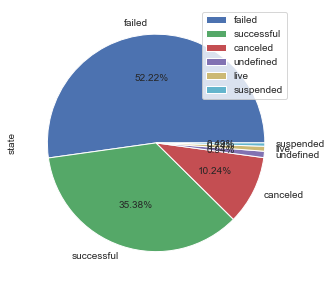

In [22]:
state.plot.pie(y='state', figsize=(5,5), autopct='%.2f%%')

#### 1c. Create a new "Completed" dataframe that removes any rows with state of 'live', 'undefined', or suspended.

In [23]:
completed = ks[(ks['state']=='successful') | (ks['state']=='failed') | (ks['state']=='canceled')]
completed.state.value_counts()

failed        197719
successful    133956
canceled       38779
Name: state, dtype: int64

#### 2a. What is the overall success rate for all completed kickstarter projects?

In [24]:
len(completed[completed.state=='successful']) / len(completed) * 100

36.15995508214245

36.16% Success rate (as of 2/5/2020 when this was run)

#### 2b. Which 5 projects were pledged the most money (usd_pledged_real)?

In [25]:
# check out top 10 for fun
completed.sort_values('usd_pledged_real', ascending=False).head(10)

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
ID,,,,,,,,,,,,,,
1799979574,"Pebble Time - Awesome Smartwatch, No Compromises",Product Design,Design,USD,2015-03-28,500000.0,2015-02-24 15:44:42,20338986.27,successful,78471,US,20338986.27,20338986.27,500000.0
342886736,COOLEST COOLER: 21st Century Cooler that's Act...,Product Design,Design,USD,2014-08-30,50000.0,2014-07-08 10:14:37,13285226.36,successful,62642,US,13285226.36,13285226.36,50000.0
2103598555,"Pebble 2, Time 2 + All-New Pebble Core",Product Design,Design,USD,2016-06-30,1000000.0,2016-05-24 15:49:52,12779843.49,successful,66673,US,12779843.49,12779843.49,1000000.0
545070200,Kingdom Death: Monster 1.5,Tabletop Games,Games,USD,2017-01-08,100000.0,2016-11-25 06:01:41,12393139.69,successful,19264,US,5228482.00,12393139.69,100000.0
506924864,Pebble: E-Paper Watch for iPhone and Android,Product Design,Design,USD,2012-05-19,100000.0,2012-04-11 06:59:04,10266845.74,successful,68929,US,10266845.74,10266845.74,100000.0
565687737,The World's Best TRAVEL JACKET with 15 Feature...,Product Design,Design,USD,2015-09-03,20000.0,2015-07-07 13:52:34,9192055.66,successful,44949,US,9192055.66,9192055.66,20000.0
1955357092,Exploding Kittens,Tabletop Games,Games,USD,2015-02-20,10000.0,2015-01-20 19:00:19,8782571.99,successful,219382,US,8782571.99,8782571.99,10000.0
1033978702,OUYA: A New Kind of Video Game Console,Gaming Hardware,Games,USD,2012-08-09,950000.0,2012-07-10 14:44:41,8596474.58,successful,63416,US,8596474.58,8596474.58,950000.0
647013276,"THE 7th CONTINENT – What Goes Up, Must Come Down.",Tabletop Games,Games,USD,2017-10-19,40000.0,2017-09-26 20:00:02,7072757.00,successful,43733,US,1574139.50,7072757.00,40000.0


#### 2c. Which 5 projects had the most backers?

In [26]:
# check out top 10 for fun
completed.sort_values('backers', ascending=False).head(10)

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
ID,,,,,,,,,,,,,,
1955357092,Exploding Kittens,Tabletop Games,Games,USD,2015-02-20,10000.0,2015-01-20 19:00:19,8782571.99,successful,219382,US,8782571.99,8782571.99,10000.00
1386523707,Fidget Cube: A Vinyl Desk Toy,Product Design,Design,USD,2016-10-20,15000.0,2016-08-30 22:02:09,6465690.30,successful,154926,US,13770.00,6465690.30,15000.00
557230947,"Bring Reading Rainbow Back for Every Child, Ev...",Web,Technology,USD,2014-07-02,1000000.0,2014-05-28 15:05:45,5408916.95,successful,105857,US,5408916.95,5408916.95,1000000.00
1755266685,The Veronica Mars Movie Project,Narrative Film,Film & Video,USD,2013-04-13,2000000.0,2013-03-13 15:42:22,5702153.38,successful,91585,US,5702153.38,5702153.38,2000000.00
1929840910,Double Fine Adventure,Video Games,Games,USD,2012-03-14,400000.0,2012-02-09 02:52:52,3336371.92,successful,87142,US,3336371.92,3336371.92,400000.00
1118803016,Bears vs Babies - A Card Game,Tabletop Games,Games,USD,2016-11-18,10000.0,2016-10-18 18:59:32,3215679.79,successful,85581,US,1231455.60,3215679.79,10000.00
1799979574,"Pebble Time - Awesome Smartwatch, No Compromises",Product Design,Design,USD,2015-03-28,500000.0,2015-02-24 15:44:42,20338986.27,successful,78471,US,20338986.27,20338986.27,500000.00
286165030,Torment: Tides of Numenera,Video Games,Games,USD,2013-04-06,900000.0,2013-03-06 14:47:37,4188927.49,successful,74405,US,4188927.49,4188927.49,900000.00
458565935,Project Eternity,Video Games,Games,USD,2012-10-17,1100000.0,2012-09-14 19:01:04,3986929.49,successful,73986,US,3986929.49,3986929.49,1100000.00


#### 2d. Which year had the most competition? (# of projects)

In [27]:
completedLaunch = completed.reset_index()
completedLaunch.set_index('launched', inplace=True)
completedLaunch.sort_values('launched').head(10)
# completedLaunch['ID'].resample('Y').count()

,ID,name,category,main_category,currency,deadline,goal,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
launched,,,,,,,,,,,,,,
1970-01-01 01:00:00,330942060,"Help RIZ Make A Charity Album: 8 Songs, 8 Caus...",Music,Music,USD,2010-05-04,10000.0,0.0,canceled,0,US,0.0,0.0,10000.0
1970-01-01 01:00:00,1384087152,"""ICHOR"" (Canceled)",Film & Video,Film & Video,USD,2010-05-21,700.0,0.0,canceled,0,US,0.0,0.0,700.0
1970-01-01 01:00:00,1245461087,1st Super-Size Painting - Social Network Owned...,Art,Art,USD,2010-08-14,15000.0,0.0,canceled,0,US,0.0,0.0,15000.0
1970-01-01 01:00:00,1014746686,Salt of the Earth: A Dead Sea Movie (Canceled),Film & Video,Film & Video,USD,2010-09-15,5000.0,0.0,canceled,0,US,0.0,0.0,5000.0
1970-01-01 01:00:00,1480763647,"Support Solo Theater! Help ""Ungrateful Daughte...",Theater,Theater,USD,2010-06-01,4000.0,0.0,canceled,0,US,0.0,0.0,4000.0
1970-01-01 01:00:00,462917959,Identity Communications Infographic (Canceled),Design,Design,USD,2010-04-10,500.0,0.0,canceled,0,US,0.0,0.0,500.0
2009-04-21 21:02:48,1860890148,Grace Jones Does Not Give A F$#% T-Shirt (limi...,Fashion,Fashion,USD,2009-05-31,1000.0,625.0,failed,30,US,625.0,625.0,1000.0
2009-04-23 00:07:53,709707365,CRYSTAL ANTLERS UNTITLED MOVIE,Shorts,Film & Video,USD,2009-07-20,80000.0,22.0,failed,3,US,22.0,22.0,80000.0
2009-04-24 21:52:03,1703704063,drawing for dollars,Illustration,Art,USD,2009-05-03,20.0,35.0,successful,3,US,35.0,35.0,20.0


Looks like there's some garbage launch dates: 6 projects with 1/1/1970 when the oldest projects are all in 2009.  Exclude those 6 deals in the competition calculation

In [28]:
completedLaunch.loc['2009-01-01':]['ID'].resample('Y').count().sort_values(ascending=False)

launched
2015-12-31    74199
2014-12-31    66724
2016-12-31    56411
2017-12-31    49185
2013-12-31    44791
2012-12-31    41111
2011-12-31    26193
2010-12-31    10503
2009-12-31     1329
2018-12-31        2
Name: ID, dtype: int64

2015 was the year with the most projects launched (competition) with 74,199.  Interestingly, the project count dropped to 56,411 in 2016, and then dropped again to 49,185 in 2017.

#### 3a. What is the success rate for all projects broken down by main_category? 

In [29]:
# get counts by category
allByMC = completed.groupby('main_category')['state'].count().to_frame()
allByMC.columns=['count']
allByMC['count_pct'] = round( (allByMC['count'] / allByMC['count'].sum() ), 3)
allByMC

,count,count_pct
main_category,,
Art,27863,0.075
Comics,10720,0.029
Crafts,8661,0.023
Dance,3736,0.010
Design,29516,0.080
Fashion,22425,0.061
Film & Video,62282,0.168
Food,24265,0.066
Games,34723,0.094


In [30]:
# get counts of successful by category
successByMC = completed[completed['state']=='successful'].groupby('main_category').count()['state'].to_frame()
successByMC.columns=['count']
successByMC['count_pct'] = round( (successByMC['count'] / successByMC['count'].sum() ), 3)
successByMC

,count,count_pct
main_category,,
Art,11510,0.086
Comics,5842,0.044
Crafts,2115,0.016
Dance,2338,0.017
Design,10550,0.079
Fashion,5593,0.042
Film & Video,23623,0.176
Food,6085,0.045
Games,12518,0.093


In [31]:
# now take successful counts / total counts * 100 to get percentage successful
allByMC['successRate'] = round( (successByMC['count'] / allByMC['count'] ), 3)
allByMC

,count,count_pct,successRate
main_category,,,
Art,27863,0.075,0.413
Comics,10720,0.029,0.545
Crafts,8661,0.023,0.244
Dance,3736,0.010,0.626
Design,29516,0.080,0.357
Fashion,22425,0.061,0.249
Film & Video,62282,0.168,0.379
Food,24265,0.066,0.251
Games,34723,0.094,0.361


#### 3b. Show a horizontal bar chart for project success rate by main_category, sorted by highest to lowest.

<AxesSubplot:ylabel='main_category'>

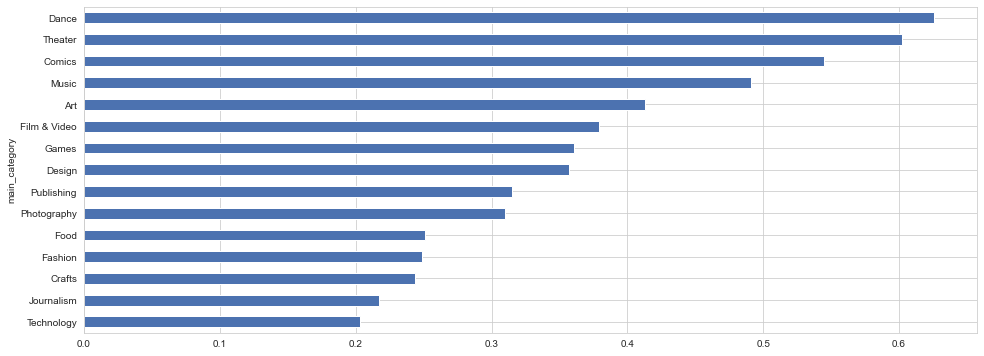

In [32]:
allByMC['successRate'].sort_values().plot.barh(figsize=(16,6))

In [33]:
# I'm going to add a successful column to the completed dataframe. Will make these analyses much easier
temp = pd.get_dummies(completed['state'])
temp = temp['successful'].to_frame()
temp.head(7)

,successful
ID,
1000002330,0
1000003930,0
1000004038,0
1000007540,0
1000011046,0
1000014025,1
1000023410,1


In [34]:
completed = pd.concat([completed, temp], axis=1)
completed.head(7)

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,successful
ID,,,,,,,,,,,,,,,
1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95,0
1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00,0
1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00,0
1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00,0
1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00,0
1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,50000.0,2016-02-26 13:38:27,52375.0,successful,224,US,52375.0,52375.0,50000.00,1
1000023410,Support Solar Roasted Coffee & Green Energy! ...,Food,Food,USD,2014-12-21,1000.0,2014-12-01 18:30:44,1205.0,successful,16,US,1205.0,1205.0,1000.00,1


#### 3c. Within the Games main_category, what is the success rate for each category within it?

In [35]:
# first get the total # of projects
gamesSubcat = pd.DataFrame()
gamesSubcat['count'] = completed[completed['main_category']=='Games'].groupby('category')['successful'].count()
gamesSubcat.sort_values('count', ascending=False)

,count
category,
Tabletop Games,14038
Video Games,11691
Games,3171
Playing Cards,2447
Mobile Games,1752
Live Games,1012
Gaming Hardware,386
Puzzles,226


In [36]:
# then get the # of successful projects
gamesSubcat['successful'] = completed[completed['main_category']=='Games'].groupby('category')['successful'].sum()
gamesSubcat.sort_values('successful', ascending=False)

,count,successful
category,,
Tabletop Games,14038,7866.0
Video Games,11691,2386.0
Playing Cards,2447,967.0
Games,3171,779.0
Live Games,1012,180.0
Mobile Games,1752,153.0
Gaming Hardware,386,99.0
Puzzles,226,88.0


In [37]:
# now calculate the success rate
gamesSubcat['successRate'] = (gamesSubcat['successful'] / gamesSubcat['count'])
gamesSubcat.sort_values('successRate', ascending=False)

,count,successful,successRate
category,,,
Tabletop Games,14038,7866.0,0.560336
Playing Cards,2447,967.0,0.395178
Puzzles,226,88.0,0.389381
Gaming Hardware,386,99.0,0.256477
Games,3171,779.0,0.245664
Video Games,11691,2386.0,0.204089
Live Games,1012,180.0,0.177866
Mobile Games,1752,153.0,0.087329


#### 4a. Calculate the 'pct_of_goal' for each completed project.

In [38]:
completed['pct_of_goal'] = round( (completed['usd_pledged_real'] / completed['usd_goal_real']), 3)
completed.head()

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,successful,pct_of_goal
ID,,,,,,,,,,,,,,,,
1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95,0,0.000
1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00,0,0.081
1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00,0,0.005
1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00,0,0.000
1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00,0,0.066


#### 4b. What were the top 5 projects when looking at pct_of_goal for all time?

In [39]:
# getting top 10 for fun
completed.sort_values('pct_of_goal', ascending=False).head(10)

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,successful,pct_of_goal
ID,,,,,,,,,,,,,,,,
9509582,VULFPECK /// The Beautiful Game,Music,Music,USD,2016-10-17,1.0,2016-08-18 09:04:03,104277.89,successful,3917,US,23874.13,104277.89,1.00,1,104277.890
1947298033,Re-covering with Friends,Rock,Music,USD,2016-12-13,1.0,2016-10-14 19:04:27,68764.10,successful,955,US,9306.00,68764.10,1.00,1,68764.100
907870443,VULFPECK /// Thrill of the Arts,Music,Music,USD,2015-10-09,1.0,2015-08-10 19:31:56,55266.57,successful,1673,US,55266.57,55266.57,1.00,1,55266.570
1388400809,Energy Hook,Video Games,Games,USD,2013-06-10,1.0,2013-05-10 01:22:38,41535.01,successful,1622,US,41535.01,41535.01,1.00,1,41535.010
1413857335,Band of Brothers 2nd Chance,Tabletop Games,Games,USD,2016-08-02,1.0,2016-07-12 00:29:12,32843.00,successful,268,US,26095.00,32843.00,1.00,1,32843.000
521903377,CLOCKWRIGHT: Large-Scale Analogue Time Machines,Sculpture,Art,USD,2016-01-13,1.0,2015-12-14 12:57:33,27588.23,successful,162,US,27588.23,27588.23,1.00,1,27588.230
951161619,Heartbreak Hits – Theo Katzman's Second LP,Music,Music,USD,2017-01-03,1.0,2016-11-04 15:52:18,24675.00,successful,665,US,7375.00,24675.00,1.00,1,24675.000
550443638,"Penny Arcade's Podcast, ""Downloadable Content""...",Radio & Podcasts,Publishing,USD,2013-05-31,10.0,2013-05-08 20:02:14,230360.67,successful,5001,US,230360.67,230360.67,10.00,1,23036.067
1077219132,THE 'mi8' RISES | The Best Wireless Duo Stereo...,Hardware,Technology,USD,2016-10-13,1.0,2016-09-13 18:03:12,22603.00,successful,163,US,9154.00,22603.00,1.00,1,22603.000


#### 4c. Plot a histogram distribution of all completed projects by pct_of_goal

<AxesSubplot:>

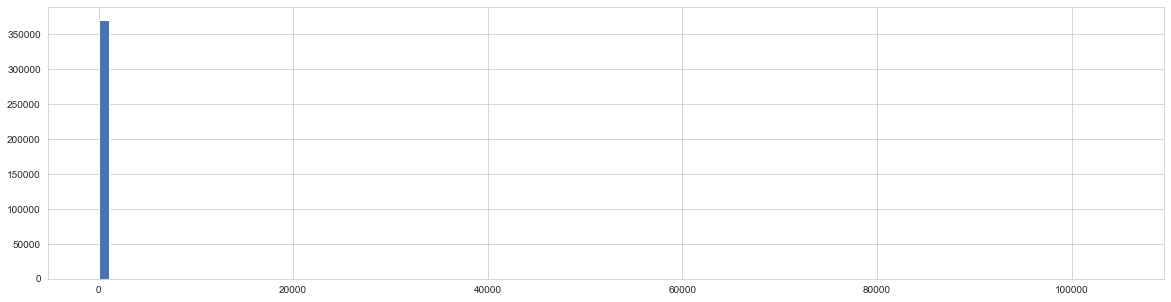

In [40]:
completed['pct_of_goal'].hist(bins=100, figsize=(20,5))

Woah... there are some outliers that are causing some major issues here.  Resolve that to make the histogram more informative

<AxesSubplot:xlabel='pct_of_goal', ylabel='Density'>

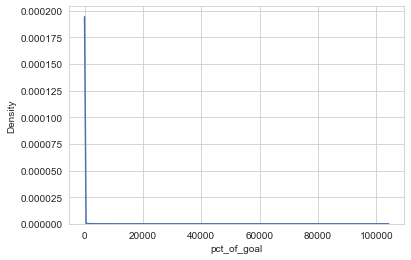

In [41]:
# look at the kernel density estimate
sns.kdeplot(data=completed['pct_of_goal'])

Looks like we can set a cutoff at 20,000 to get the majority of the data

<AxesSubplot:>

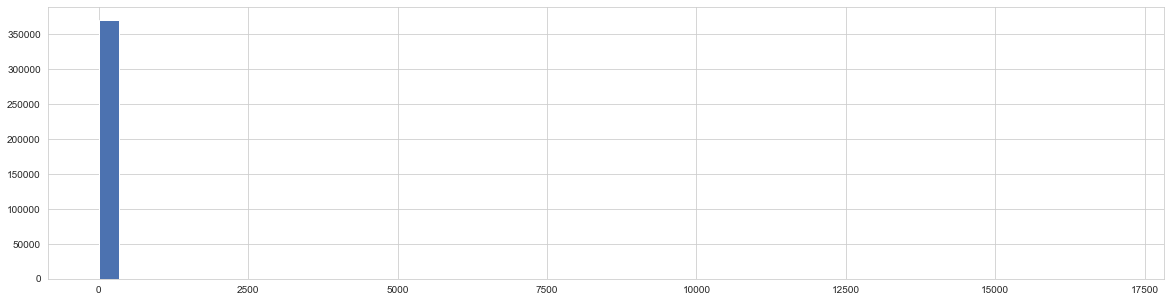

In [42]:
completed[completed['pct_of_goal']<20000]['pct_of_goal'].hist(bins=50, figsize=(20,5))

Need to zoom in more.  After playing around with the data, we'll need to zoom in to anything < 2 (200% of goal) to get useful results

<AxesSubplot:>

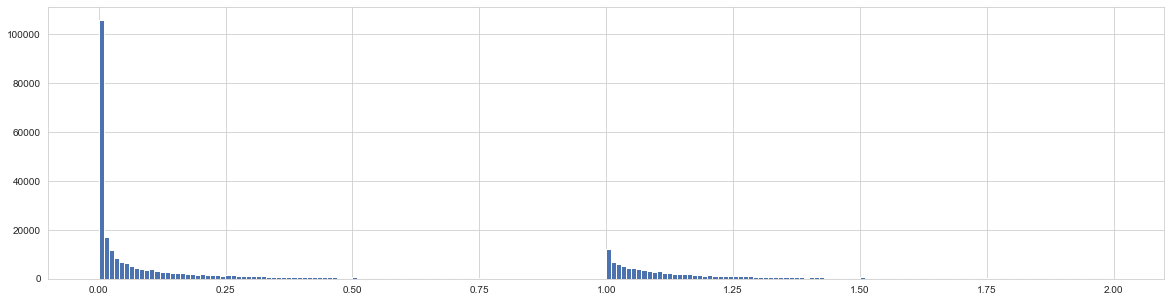

In [43]:
# using 200 bins so each bar represents 1% of goal
completed[completed['pct_of_goal']<2]['pct_of_goal'].hist(bins=200, figsize=(20,5))

/Users/Brian/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='pct_of_goal', ylabel='Density'>

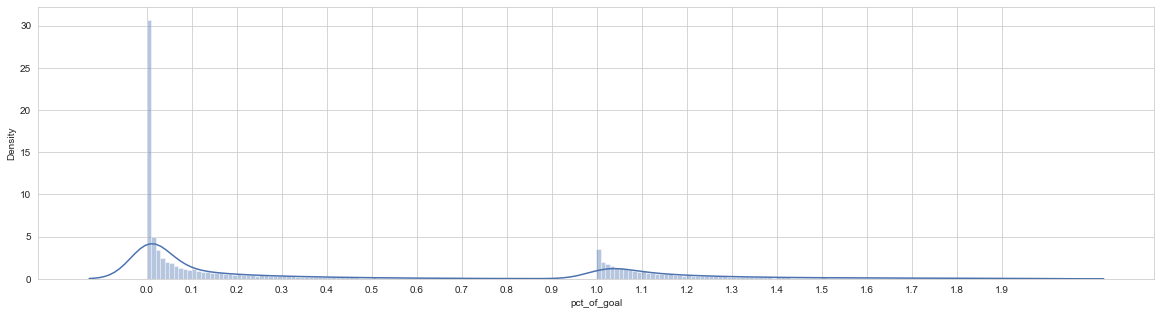

In [44]:
# And the same plot using Seaborn for practice
# using 200 bins so each bar represents 1% of goal
plt.figure(figsize=(20,5))
plt.xticks(np.arange(0,2, step=0.1))
sns.distplot(completed[completed['pct_of_goal']<2]['pct_of_goal'], bins=200)

Interesting...  The vast majority of projects don't even reach 1% of goal.  Also, after about 25% of goal, there's a "deadzone" up to 100% of goal where we get an expected spike from those who *barely* reach their goal.  
Let's take a look at the same barplot but exclude any with <1% of goal

/Users/Brian/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='pct_of_goal', ylabel='Density'>

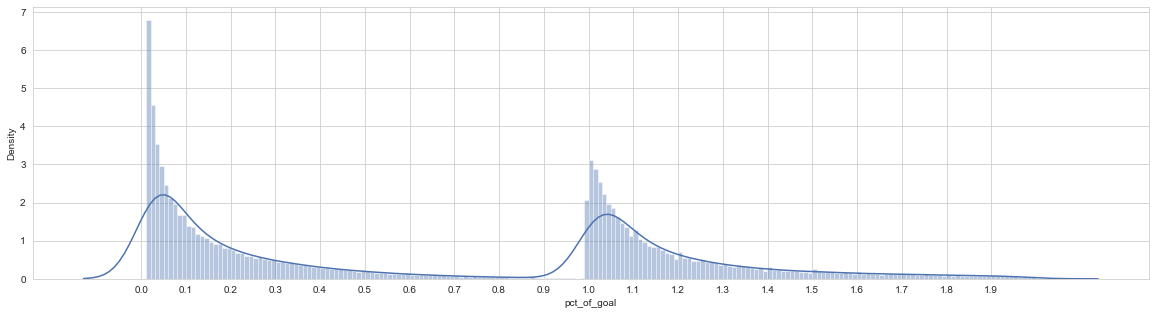

In [45]:
# using 199 bins so each bar represents 1% of goal
plt.figure(figsize=(20,5))
plt.xticks(np.arange(0,2, step=0.1))
sns.distplot(completed[(completed['pct_of_goal']<2) & (completed['pct_of_goal']>.01)]['pct_of_goal'], bins=199)

This zoomed in view is much more informative.  For analyses in future projects, consider excluding projects with <1% of goal since they are junk projects that may be skewing the results.

#### 4d. Create 2 histogram subplots by pct_of_goal: 1) state=successful, and 2) all others (failed)

<AxesSubplot:xlabel='successful', ylabel='count'>

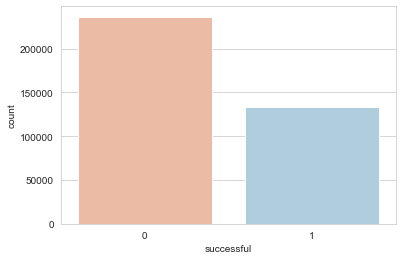

In [46]:
sns.countplot(data=completed, x='successful', palette='RdBu')

#### 5a. What is the average usd_goal_real for all completed kickstarter projects, broken down by main_category. 

In [47]:
allByMC['goal_avg'] = round(completed.groupby(by='main_category')['usd_goal_real'].mean(), 0)
allByMC

,count,count_pct,successRate,goal_avg
main_category,,,,
Art,27863,0.075,0.413,39468.0
Comics,10720,0.029,0.545,19676.0
Crafts,8661,0.023,0.244,10423.0
Dance,3736,0.010,0.626,9409.0
Design,29516,0.080,0.357,42199.0
Fashion,22425,0.061,0.249,22530.0
Film & Video,62282,0.168,0.379,82376.0
Food,24265,0.066,0.251,48661.0
Games,34723,0.094,0.361,45148.0


In [48]:
# also look at only the successful projects
successByMC['goal_avg'] = round(completed[completed['state']=='successful'].groupby(by='main_category')['usd_goal_real'].mean(), 0)
successByMC

,count,count_pct,goal_avg
main_category,,,
Art,11510,0.086,4410.0
Comics,5842,0.044,5397.0
Crafts,2115,0.016,3013.0
Dance,2338,0.017,4601.0
Design,10550,0.079,15409.0
Fashion,5593,0.042,9081.0
Film & Video,23623,0.176,11145.0
Food,6085,0.045,11634.0
Games,12518,0.093,14857.0


#### 5b. What is the median usd_goal_real for all completed kickstarter projects, broken down by main_category.

In [49]:
allByMC['goal_median'] = round(completed.groupby(by='main_category')['usd_goal_real'].median(), 0)
allByMC

,count,count_pct,successRate,goal_avg,goal_median
main_category,,,,,
Art,27863,0.075,0.413,39468.0,3000.0
Comics,10720,0.029,0.545,19676.0,3500.0
Crafts,8661,0.023,0.244,10423.0,2330.0
Dance,3736,0.010,0.626,9409.0,3310.0
Design,29516,0.080,0.357,42199.0,10000.0
Fashion,22425,0.061,0.249,22530.0,5984.0
Film & Video,62282,0.168,0.379,82376.0,7000.0
Food,24265,0.066,0.251,48661.0,10000.0
Games,34723,0.094,0.361,45148.0,8000.0


In [50]:
# also look at only the successful projects
successByMC['goal_median'] = round(completed[completed['state']=='successful'].groupby(by='main_category')['usd_goal_real'].median(), 0)
successByMC

,count,count_pct,goal_avg,goal_median
main_category,,,,
Art,11510,0.086,4410.0,2000.0
Comics,5842,0.044,5397.0,2620.0
Crafts,2115,0.016,3013.0,1000.0
Dance,2338,0.017,4601.0,3000.0
Design,10550,0.079,15409.0,7500.0
Fashion,5593,0.042,9081.0,5000.0
Film & Video,23623,0.176,11145.0,5000.0
Food,6085,0.045,11634.0,7344.0
Games,12518,0.093,14857.0,5000.0


#### 5c. What is the average usd_pledged_real for all completed kickstarter projects, broken down by main_category. 

In [51]:
allByMC['pledged_mean'] = round(completed.groupby(by='main_category')['usd_pledged_real'].mean(), 0)
allByMC

,count,count_pct,successRate,goal_avg,goal_median,pledged_mean
main_category,,,,,,
Art,27863,0.075,0.413,39468.0,3000.0,3236.0
Comics,10720,0.029,0.545,19676.0,3500.0,6654.0
Crafts,8661,0.023,0.244,10423.0,2330.0,1651.0
Dance,3736,0.010,0.626,9409.0,3310.0,3478.0
Design,29516,0.080,0.357,42199.0,10000.0,24547.0
Fashion,22425,0.061,0.249,22530.0,5984.0,5762.0
Film & Video,62282,0.168,0.379,82376.0,7000.0,6248.0
Food,24265,0.066,0.251,48661.0,10000.0,5140.0
Games,34723,0.094,0.361,45148.0,8000.0,21288.0


In [52]:
# also look at only the successful projects
successByMC['pledged_mean'] = round(completed[completed['state']=='successful'].groupby(by='main_category')['usd_pledged_real'].mean(), 0)
successByMC

,count,count_pct,goal_avg,goal_median,pledged_mean
main_category,,,,,
Art,11510,0.086,4410.0,2000.0,6972.0
Comics,5842,0.044,5397.0,2620.0,11386.0
Crafts,2115,0.016,3013.0,1000.0,5630.0
Dance,2338,0.017,4601.0,3000.0,5194.0
Design,10550,0.079,15409.0,7500.0,62859.0
Fashion,5593,0.042,9081.0,5000.0,20287.0
Film & Video,23623,0.176,11145.0,5000.0,13952.0
Food,6085,0.045,11634.0,7344.0,17349.0
Games,12518,0.093,14857.0,5000.0,54229.0


#### 5d. What is the median usd_pledged_real for all completed kickstarter projects, broken down by main_category. 

In [53]:
allByMC['pledged_median'] = round(completed.groupby(by='main_category')['usd_pledged_real'].median(), 0)
allByMC

,count,count_pct,successRate,goal_avg,goal_median,pledged_mean,pledged_median
main_category,,,,,,,
Art,27863,0.075,0.413,39468.0,3000.0,3236.0,431.0
Comics,10720,0.029,0.545,19676.0,3500.0,6654.0,1506.0
Crafts,8661,0.023,0.244,10423.0,2330.0,1651.0,95.0
Dance,3736,0.010,0.626,9409.0,3310.0,3478.0,1866.0
Design,29516,0.080,0.357,42199.0,10000.0,24547.0,1926.0
Fashion,22425,0.061,0.249,22530.0,5984.0,5762.0,245.0
Film & Video,62282,0.168,0.379,82376.0,7000.0,6248.0,760.0
Food,24265,0.066,0.251,48661.0,10000.0,5140.0,260.0
Games,34723,0.094,0.361,45148.0,8000.0,21288.0,1325.0


In [54]:
# also look at only the successful projects
successByMC['pledged_median'] = round(completed[completed['state']=='successful'].groupby(by='main_category')['usd_pledged_real'].median(), 0)
successByMC

,count,count_pct,goal_avg,goal_median,pledged_mean,pledged_median
main_category,,,,,,
Art,11510,0.086,4410.0,2000.0,6972.0,2631.0
Comics,5842,0.044,5397.0,2620.0,11386.0,4000.0
Crafts,2115,0.016,3013.0,1000.0,5630.0,1825.0
Dance,2338,0.017,4601.0,3000.0,5194.0,3364.0
Design,10550,0.079,15409.0,7500.0,62859.0,14619.0
Fashion,5593,0.042,9081.0,5000.0,20287.0,6864.0
Film & Video,23623,0.176,11145.0,5000.0,13952.0,5210.0
Food,6085,0.045,11634.0,7344.0,17349.0,8952.0
Games,12518,0.093,14857.0,5000.0,54229.0,10572.0


#### 5e. What insights does this information provide? (be creative)

In [55]:
# First let's see what the median pledged / median goal looks like for all projects
allByMC['pctGoalMed'] = round( (allByMC['pledged_median'] / allByMC['goal_median']), 3)
allByMC.sort_values('pctGoalMed', ascending=False)

,count,count_pct,successRate,goal_avg,goal_median,pledged_mean,pledged_median,pctGoalMed
main_category,,,,,,,,
Dance,3736,0.010,0.626,9409.0,3310.0,3478.0,1866.0,0.564
Theater,10850,0.029,0.602,27147.0,3300.0,4017.0,1567.0,0.475
Comics,10720,0.029,0.545,19676.0,3500.0,6654.0,1506.0,0.430
Music,49254,0.133,0.491,15719.0,4000.0,3924.0,1010.0,0.252
Design,29516,0.080,0.357,42199.0,10000.0,24547.0,1926.0,0.193
Games,34723,0.094,0.361,45148.0,8000.0,21288.0,1325.0,0.166
Art,27863,0.075,0.413,39468.0,3000.0,3236.0,431.0,0.144
Film & Video,62282,0.168,0.379,82376.0,7000.0,6248.0,760.0,0.109
Photography,10675,0.029,0.310,12267.0,4000.0,3585.0,245.0,0.061


In [56]:
# and now just the successful projects
successByMC['pctGoalMed'] = round( (successByMC['pledged_median'] / successByMC['goal_median']), 3)
successByMC.sort_values('pctGoalMed', ascending=False)

,count,count_pct,goal_avg,goal_median,pledged_mean,pledged_median,pctGoalMed
main_category,,,,,,,
Technology,6434,0.048,26286.0,10000.0,93086.0,22478.0,2.248
Games,12518,0.093,14857.0,5000.0,54229.0,10572.0,2.114
Design,10550,0.079,15409.0,7500.0,62859.0,14619.0,1.949
Crafts,2115,0.016,3013.0,1000.0,5630.0,1825.0,1.825
Comics,5842,0.044,5397.0,2620.0,11386.0,4000.0,1.527
Fashion,5593,0.042,9081.0,5000.0,20287.0,6864.0,1.373
Publishing,12300,0.092,5898.0,3000.0,9437.0,4117.0,1.372
Art,11510,0.086,4410.0,2000.0,6972.0,2631.0,1.316
Photography,3305,0.025,6491.0,3000.0,10112.0,3700.0,1.233


#### Analysis:
- The averages (means) are thrown off disproportionately by a few of the very large outliers.  So rather than using the mean, the median is the more useful metric here.
- The top 6 of 15 categories when looking at median pledged / median goal are: 
  - Dance
  - Theater
  - Comics
  - Music
  - Design
  - Games
- Technology is a "feast or famine" category.  It is one of the worst ranked pledged / goal when looking at all projects, but the top ranked when only looking at successful projects.
- Journalism and Food seem to be the worst 2 main categories.

#### 5f. Based on this information, if someone wanted to choose the main_category with the highest combined success rate and pledged dollar amount, which one would you recommend?

In [57]:
# First recall the count of projects in each main category
allByMC.sort_values('count', ascending=False)

,count,count_pct,successRate,goal_avg,goal_median,pledged_mean,pledged_median,pctGoalMed
main_category,,,,,,,,
Film & Video,62282,0.168,0.379,82376.0,7000.0,6248.0,760.0,0.109
Music,49254,0.133,0.491,15719.0,4000.0,3924.0,1010.0,0.252
Publishing,39047,0.105,0.315,22591.0,5000.0,3398.0,291.0,0.058
Games,34723,0.094,0.361,45148.0,8000.0,21288.0,1325.0,0.166
Technology,31765,0.086,0.203,102154.0,20000.0,21186.0,317.0,0.016
Design,29516,0.080,0.357,42199.0,10000.0,24547.0,1926.0,0.193
Art,27863,0.075,0.413,39468.0,3000.0,3236.0,431.0,0.144
Food,24265,0.066,0.251,48661.0,10000.0,5140.0,260.0,0.026
Fashion,22425,0.061,0.249,22530.0,5984.0,5762.0,245.0,0.041


In [58]:
# recall the success rate values
allByMC.sort_values('successRate', ascending=False)

,count,count_pct,successRate,goal_avg,goal_median,pledged_mean,pledged_median,pctGoalMed
main_category,,,,,,,,
Dance,3736,0.010,0.626,9409.0,3310.0,3478.0,1866.0,0.564
Theater,10850,0.029,0.602,27147.0,3300.0,4017.0,1567.0,0.475
Comics,10720,0.029,0.545,19676.0,3500.0,6654.0,1506.0,0.430
Music,49254,0.133,0.491,15719.0,4000.0,3924.0,1010.0,0.252
Art,27863,0.075,0.413,39468.0,3000.0,3236.0,431.0,0.144
Film & Video,62282,0.168,0.379,82376.0,7000.0,6248.0,760.0,0.109
Games,34723,0.094,0.361,45148.0,8000.0,21288.0,1325.0,0.166
Design,29516,0.080,0.357,42199.0,10000.0,24547.0,1926.0,0.193
Publishing,39047,0.105,0.315,22591.0,5000.0,3398.0,291.0,0.058


In [59]:
# Calculate an expected value for each main category by taking pledged_median * successRate
allByMC['exp_value'] = round( (allByMC['pledged_median'] / allByMC['successRate']), 0)
allByMC.sort_values('exp_value', ascending=False)

,count,count_pct,successRate,goal_avg,goal_median,pledged_mean,pledged_median,pctGoalMed,exp_value
main_category,,,,,,,,,
Design,29516,0.080,0.357,42199.0,10000.0,24547.0,1926.0,0.193,5395.0
Games,34723,0.094,0.361,45148.0,8000.0,21288.0,1325.0,0.166,3670.0
Dance,3736,0.010,0.626,9409.0,3310.0,3478.0,1866.0,0.564,2981.0
Comics,10720,0.029,0.545,19676.0,3500.0,6654.0,1506.0,0.430,2763.0
Theater,10850,0.029,0.602,27147.0,3300.0,4017.0,1567.0,0.475,2603.0
Music,49254,0.133,0.491,15719.0,4000.0,3924.0,1010.0,0.252,2057.0
Film & Video,62282,0.168,0.379,82376.0,7000.0,6248.0,760.0,0.109,2005.0
Technology,31765,0.086,0.203,102154.0,20000.0,21186.0,317.0,0.016,1562.0
Art,27863,0.075,0.413,39468.0,3000.0,3236.0,431.0,0.144,1044.0


#### Initial Thoughts:
- The `Dance` category has a surprisingly high success rate (63%) as well as median pledged amount ($1,866)   There is also very low competition in that group with only 1% of the total projecdt count.
- Looking at expected value (median_pledged * successRate) will provide the most useful info since it combines multple metrics into one
- The top 8 out of 15 categories based on expected value are:
  - Design $5395
  - Games $3670
  - Dance $2981
  - Comics $2763
  - Theater $2603
  - Music $2057
  - Film & Video $2005

#### Recommendations:
- For overall expected value: Design
- For highest chances of success, low competition, and decent expected value: Dance
- But in the end, a project is only successful if it is done well, so I would recommend any of the 8 above with highest expected value (Design, Games, Dance, Comics, Theater, Music, Film & Video), and tell the person to choose the one that they are most skilled at or have some sort of competitive advantage.
- As for what main categories NOT to choose, I would tell them to avoid Journalism and Crafts like the plague, and be careful of Technology because it has a very low success rate, and it's either feast or famine with that group.  Those that succeed do extremely well, but the majority of them do not succeed.

#### 6a. Create a new column 'months' that shows how many months the project was active between launch and deadline.

In [60]:
# Changing this one to `duration` instead and leaving it with the days count.  That's more granular and useful
completed['duration'] = (completed['deadline'] - completed['launched'])
completed.head(3)

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,successful,pct_of_goal,duration
ID,,,,,,,,,,,,,,,,,
1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95,0,0.000,58 days 11:47:32
1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00,0,0.081,59 days 19:16:03
1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00,0,0.005,44 days 23:39:10


In [61]:
# Now I'd like to convert duration from timedelta into days format to make it easier to work with and use in data viz
# Difficult to do on a series, start by looking at one value

# completed.loc[1000002330, 'duration'].days
# is the same as:
completed.loc[1000002330].at['duration'].days

58

In [62]:
# Use .map and a lambda function to access the .days property of each item in the series, and then assign it as the new duration value
completed['duration'] = completed['duration'].map(lambda ts : ts.days)
completed.head(3)

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,successful,pct_of_goal,duration
ID,,,,,,,,,,,,,,,,,
1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95,0,0.000,58
1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00,0,0.081,59
1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00,0,0.005,44


#### 6b. Compare the avg days for successful projects vs non-successful. Add visuals if you'd like.

<AxesSubplot:xlabel='successful', ylabel='duration'>

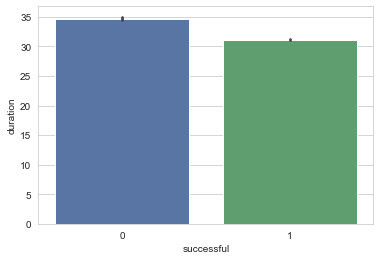

In [63]:
sns.barplot(data=completed, x='successful', y='duration')

#### 6c. Does the length of a project in months seem to have an impact?

Analysis:
- not much difference here
- Avg unsuccessful project = 35 days
- Avg successful project = 31 days

### Let's zoom in on Games: Video Games (main_category: category)

#### 7a. Calculate the expected value for the Games: Video Games category, with the expected value defined as (median of usd_pledged_real)* (success rate of completed projects).

In [64]:
# First let's add the median pledged amount to the gamesSubcat created earlier
gamesSubcat['pledged_median'] = completed[completed['main_category']=='Games'].groupby('category').median()['usd_pledged_real']
gamesSubcat

,count,successful,successRate,pledged_median
category,,,,
Games,3171,779.0,0.245664,244.97
Gaming Hardware,386,99.0,0.256477,458.74
Live Games,1012,180.0,0.177866,100.00
Mobile Games,1752,153.0,0.087329,25.00
Playing Cards,2447,967.0,0.395178,1680.00
Puzzles,226,88.0,0.389381,796.00
Tabletop Games,14038,7866.0,0.560336,4593.00
Video Games,11691,2386.0,0.204089,417.11


In [65]:
# Now let's add the goal_median for reference
gamesSubcat['goal_median'] = completed[completed['main_category']=='Games'].groupby('category').median()['usd_goal_real']
gamesSubcat

,count,successful,successRate,pledged_median,goal_median
category,,,,,
Games,3171,779.0,0.245664,244.97,6500.000
Gaming Hardware,386,99.0,0.256477,458.74,10000.000
Live Games,1012,180.0,0.177866,100.00,10000.000
Mobile Games,1752,153.0,0.087329,25.00,7000.000
Playing Cards,2447,967.0,0.395178,1680.00,6343.230
Puzzles,226,88.0,0.389381,796.00,5000.000
Tabletop Games,14038,7866.0,0.560336,4593.00,7388.435
Video Games,11691,2386.0,0.204089,417.11,10594.980


In [66]:
# And the pct_of_goal for reference
gamesSubcat['pct_of_goal'] = gamesSubcat['pledged_median'] / gamesSubcat['goal_median']
gamesSubcat

,count,successful,successRate,pledged_median,goal_median,pct_of_goal
category,,,,,,
Games,3171,779.0,0.245664,244.97,6500.000,0.037688
Gaming Hardware,386,99.0,0.256477,458.74,10000.000,0.045874
Live Games,1012,180.0,0.177866,100.00,10000.000,0.010000
Mobile Games,1752,153.0,0.087329,25.00,7000.000,0.003571
Playing Cards,2447,967.0,0.395178,1680.00,6343.230,0.264849
Puzzles,226,88.0,0.389381,796.00,5000.000,0.159200
Tabletop Games,14038,7866.0,0.560336,4593.00,7388.435,0.621647
Video Games,11691,2386.0,0.204089,417.11,10594.980,0.039369


In [67]:
# Lastly, we'll calculate the expected value
gamesSubcat['exp_value'] = round( (gamesSubcat['pledged_median'] * gamesSubcat['successRate']), 0)
gamesSubcat.sort_values('exp_value', ascending=False)

,count,successful,successRate,pledged_median,goal_median,pct_of_goal,exp_value
category,,,,,,,
Tabletop Games,14038,7866.0,0.560336,4593.00,7388.435,0.621647,2574.0
Playing Cards,2447,967.0,0.395178,1680.00,6343.230,0.264849,664.0
Puzzles,226,88.0,0.389381,796.00,5000.000,0.159200,310.0
Gaming Hardware,386,99.0,0.256477,458.74,10000.000,0.045874,118.0
Video Games,11691,2386.0,0.204089,417.11,10594.980,0.039369,85.0
Games,3171,779.0,0.245664,244.97,6500.000,0.037688,60.0
Live Games,1012,180.0,0.177866,100.00,10000.000,0.010000,18.0
Mobile Games,1752,153.0,0.087329,25.00,7000.000,0.003571,2.0


#### 7b. Do this again but broken down by deadline year

In [68]:
# This'll be tricky.  A Pivot Table would handle this best
# First create a column for deadline year
completed['endYr'] = completed['deadline'].map(lambda dt : dt.year)
completed.head(3)

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,successful,pct_of_goal,duration,endYr
ID,,,,,,,,,,,,,,,,,,
1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95,0,0.000,58,2015
1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00,0,0.081,59,2017
1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00,0,0.005,44,2013


In [69]:
# Now create a pivot table of categories in the 'Games' main_cat and the columns will be the endYr
# Get count of name, median of usd_pledged_real, and sum of successful to calculate success rate and then exp_value
gamesPT = pd.pivot_table(completed[completed['main_category']=='Games'], index=['category', 'endYr'], values=['name', 'usd_pledged_real', 'successful'], 
               fill_value=0, aggfunc={'name':'count', 'usd_pledged_real':'median', 'successful':np.sum})
gamesPT

name  successful  usd_pledged_real
category    endYr                                    
Games       2009      1           1          3505.120
            2010     16           9           906.655
            2011    127          54           966.000
            2012    361         178          1841.000
            2013    388          83           440.370
...                 ...         ...               ...
Video Games 2014   2103         421           501.000
            2015   2202         373           189.000
            2016   1934         382           251.500
            2017   1685         347           277.000
            2018     10           0            48.500

[61 rows x 3 columns]

In [70]:
# Now calculate the success rate
gamesPT['successRate'] = gamesPT['successful'] / gamesPT['name']
gamesPT

name  successful  usd_pledged_real  successRate
category    endYr                                                 
Games       2009      1           1          3505.120     1.000000
            2010     16           9           906.655     0.562500
            2011    127          54           966.000     0.425197
            2012    361         178          1841.000     0.493075
            2013    388          83           440.370     0.213918
...                 ...         ...               ...          ...
Video Games 2014   2103         421           501.000     0.200190
            2015   2202         373           189.000     0.169391
            2016   1934         382           251.500     0.197518
            2017   1685         347           277.000     0.205935
            2018     10           0            48.500     0.000000

[61 rows x 4 columns]

In [71]:
# Now calculate the expected value
gamesPT['exp_value'] = round( (gamesPT['usd_pledged_real'] * gamesPT['successRate']), 0)
gamesPT

name  successful  usd_pledged_real  successRate  exp_value
category    endYr                                                            
Games       2009      1           1          3505.120     1.000000     3505.0
            2010     16           9           906.655     0.562500      510.0
            2011    127          54           966.000     0.425197      411.0
            2012    361         178          1841.000     0.493075      908.0
            2013    388          83           440.370     0.213918       94.0
...                 ...         ...               ...          ...        ...
Video Games 2014   2103         421           501.000     0.200190      100.0
            2015   2202         373           189.000     0.169391       32.0
            2016   1934         382           251.500     0.197518       50.0
            2017   1685         347           277.000     0.205935       57.0
            2018     10           0            48.500     0.000000        0.0

[61 rows x 5 columns]

In [72]:
# Finally let's shift the Pivot Table so we can see the years as columns and categories as rows
gamesPT.unstack(fill_value=0)['exp_value']

endYr,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
category,,,,,,,,,,
Games,3505.0,510.0,411.0,908.0,94.0,17.0,15.0,27.0,80.0,0.0
Gaming Hardware,0.0,0.0,0.0,2437430.0,673925.0,8.0,32.0,333.0,514.0,0.0
Live Games,0.0,0.0,0.0,0.0,3500.0,10.0,6.0,32.0,36.0,0.0
Mobile Games,0.0,0.0,0.0,0.0,0.0,3.0,1.0,2.0,5.0,0.0
Playing Cards,0.0,0.0,0.0,0.0,0.0,1577.0,394.0,545.0,1023.0,219.0
Puzzles,2398.0,0.0,33.0,1325.0,1326.0,734.0,75.0,264.0,143.0,0.0
Tabletop Games,431.0,136.0,1027.0,1674.0,2751.0,2550.0,2293.0,2939.0,3044.0,0.0
Video Games,86.0,81.0,80.0,166.0,272.0,100.0,32.0,50.0,57.0,0.0


Whew that was a challenge!  But an interesting one.  
Hmm... looks like we have some outlier data causing issues with Gaming Hardward in 2012 and 2013.  Will have to think about what to do with these.

#### 7c. Show this in a bar chart

<AxesSubplot:xlabel='category'>

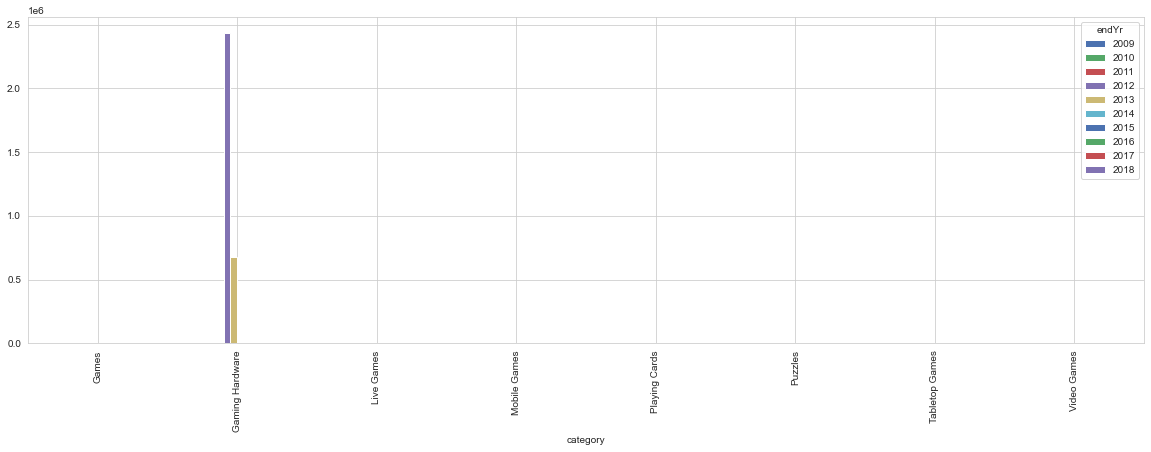

In [73]:
gamesPT.unstack(fill_value=0)['exp_value'].plot.bar(figsize=(20,6))

<AxesSubplot:xlabel='category'>

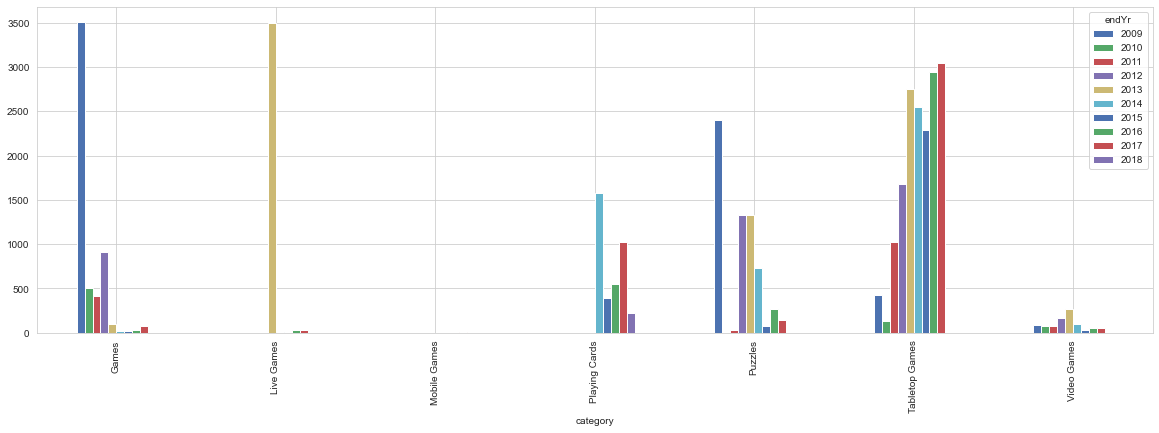

In [74]:
# Gaming hardware is causing issues as expected.  Let's just drop that one
gamesPT.drop('Gaming Hardware').unstack(fill_value=0)['exp_value'].plot.bar(figsize=(20,6))

#### 7d. What insights does this data provide you?

Analysis:
- The expected values seem to be too low... For a future test, calculate expected value by using the mean instead of the median, and exclude any projects that didn't reach 1% of goal since that is a huge number of junk data that is skewing the results
- That being said, these results clearly show that Tabletop Games is the star category within the Games main category, and has been consistently growing every year.
- 2nd best would be Playing cards, 3rd best is "Games", 4th best is the declining Puzzles, 5th best is the consistent but low EV video games, then last are Live and Mobile games
- The clear takeaway is that Tabletop Games are dominant in this category and only continuing to be more dominant.  More insights could be provided by breaking down the data as mentioned earlier.

### Let's zoom in on personal planners

#### 8a. Calculate the count, success rate, and pct_of_goal for all projects with 'planner' in the name.

In [75]:
import re   # regex to use re.IGNORECASE
plannersBool = completed['name'].str.contains('Planner', na=False, flags=re.IGNORECASE)
plannersBool

ID
1000002330    False
1000003930    False
1000004038    False
1000007540    False
1000011046    False
              ...  
999976400     False
999977640     False
999986353     False
999987933     False
999988282     False
Name: name, Length: 370454, dtype: bool

In [76]:
planners = completed[plannersBool]
planners.head(3)

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,successful,pct_of_goal,duration,endYr
ID,,,,,,,,,,,,,,,,,,
1016125600,RICH Living Weekly Planner 2018,Calendars,Publishing,AUD,2017-10-16,22000.0,2017-09-24 22:10:36,10826.0,failed,138,AU,736.14,8498.31,17269.8,0,0.492,21,2017
1023441131,Fertility in Focus | An IVF Planner,Product Design,Design,USD,2017-09-28,12500.0,2017-08-29 15:43:20,1020.0,failed,18,US,0.00,1020.00,12500.0,0,0.082,29,2017
1023899010,The Boss Planner: An Outspoken Guide to Gettin...,Calendars,Publishing,USD,2016-10-30,18286.0,2016-09-30 18:00:38,21421.0,successful,390,US,8241.00,21421.00,18286.0,1,1.171,29,2016


In [77]:
# Count of total Planner projects
len(planners)

356

In [78]:
# Success Rate of Planner projects
round( (planners['successful'].sum() / len(planners) * 100), 1)

36.0

In [79]:
# pct of goal was already calculated earlier on completed, so I'll just isolate it here
planners[['name', 'pct_of_goal']].sort_values(by='pct_of_goal', ascending=False)

,name,pct_of_goal
ID,,
1653584458,Passion Planner: The One Place for All Your Th...,65.843
1480308364,Passion Planner Eco: Growing Together.,53.418
443600622,"Passion Planner: Get One, Give One",47.086
1230726510,Bay Area Regional Planner,36.722
766083137,"ANEW - Reusable Whiteboard Planner, Notebook, ...",35.210
...,...,...
1202100087,CELEBRATIONS: Everyone can be a Party Planner!...,0.000
267356645,Create you own success with the Succes(s) Planner,0.000
265279050,The ultimate family planner,0.000


#### 8b. How about all projects with both 'planner' and 'Panda' in the name?

In [80]:
planners[planners['name'].str.contains('Panda', na=False, flags=re.IGNORECASE)]

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,successful,pct_of_goal,duration,endYr
ID,,,,,,,,,,,,,,,,,,
980774782,Panda Planner Pro: Happiness + Productivity = ...,Product Design,Design,USD,2016-04-02,10000.0,2016-02-29 17:00:53,26944.0,successful,829,US,26944.0,26944.0,10000.0,1,2.694,32,2016


Congrats Mike!

## Bonus insights
Feel free to add any other interesting findings from the dataset here

In [81]:
# Already left a lot of comments earlier for potential improvements.  
# There is a huge number of failed projects that didn't even get 1% of the goal.  
# This is probably because it is very easy to start a kickstarter, so there are probably a lot of people who just threw one together without a lot of effort
# Next time around, look into this population of <1% pledged, exclude them, then run all the useful analyses on the remaining "good" data.
# Also, consider changing the expected value calc from median * success rate to mean * success rate.  Will need to exclude outliers to make the number meaningful

In [82]:
# Now I'm just curious about this one
completed[completed['name'].str.contains("Locked Up", na=False)]

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,successful,pct_of_goal,duration,endYr
ID,,,,,,,,,,,,,,,,,,
1026735199,Locked Up,Fiction,Publishing,USD,2014-05-22,700.0,2014-04-22 16:07:47,1058.0,successful,92,US,1058.0,1058.0,700.0,1,1.511,29,2014
1675406686,Locked Up: LIFE WITHOUT PAROLE,Film & Video,Film & Video,USD,2016-10-12,26500.0,2016-09-17 15:55:55,4149.0,failed,66,US,2192.0,4149.0,26500.0,0,0.157,24,2016
337195329,Locked Up - The World's First Prison RPG,Video Games,Games,USD,2017-06-02,530000.0,2017-04-28 02:22:36,23400.0,canceled,262,US,15370.0,23400.0,530000.0,0,0.044,34,2017


Some people were asking me about Kickstarter stats in the video game category after x% of goal is reached (1%, 10%, etc)
This is useful because it filters out the <1% campaigns (throwaway), and can give you a good idea of your success rate along the way

In [90]:
# Run some analytics on the projects that completed > 1% (filter out the huge number of projects that were basically throwaways)

completedOver1 = completed[completed['pct_of_goal']>0.01]
gamesPTOver1 = pd.pivot_table(completedOver1[completedOver1['main_category']=='Games'], index=['category', 'endYr'], values=['name', 'usd_pledged_real', 'successful'], 
               fill_value=0, aggfunc={'name':'count', 'usd_pledged_real':'median', 'successful':np.sum})
gamesPTOver1['successRate'] = gamesPTOver1['successful'] / gamesPTOver1['name']
gamesPTOver1.loc[['Video Games']]

name  successful  usd_pledged_real  successRate
category    endYr                                                 
Video Games 2009     17           9            850.00     0.529412
            2010    106          40           1002.50     0.377358
            2011    227          85           1091.00     0.374449
            2012   1013         293           2150.00     0.289240
            2013   1376         436           3176.00     0.316860
            2014   1409         421           2327.77     0.298793
            2015   1343         373           1321.00     0.277736
            2016   1227         382           1403.00     0.311328
            2017   1147         347           1103.86     0.302528
            2018      5           0            110.00     0.000000

In [84]:
gamesPTOver1 = pd.pivot_table(completedOver1[completedOver1['main_category']=='Games'], index=['category'], values=['name', 'usd_pledged_real', 'successful'], 
               fill_value=0, aggfunc={'name':'count', 'usd_pledged_real':'median', 'successful':np.sum})
gamesPTOver1['successRate'] = gamesPTOver1['successful'] / gamesPTOver1['name']
gamesPTOver1

,name,successful,usd_pledged_real,successRate
category,,,,
Games,1952,779,1347.485,0.399078
Gaming Hardware,238,99,2562.000,0.415966
Live Games,496,180,818.960,0.362903
Mobile Games,684,153,479.645,0.223684
Playing Cards,2104,967,2495.500,0.459601
Puzzles,169,88,2044.490,0.520710
Tabletop Games,13049,7866,5503.250,0.602805
Video Games,7870,2386,1747.540,0.303177


In [85]:
completedOver10 = completed[completed['pct_of_goal']>0.1]
gamesPTOver10 = pd.pivot_table(completedOver10[completedOver10['main_category']=='Games'], index=['category'], values=['name', 'usd_pledged_real', 'successful'], 
               fill_value=0, aggfunc={'name':'count', 'usd_pledged_real':'median', 'successful':np.sum})
gamesPTOver10['successRate'] = gamesPTOver10['successful'] / gamesPTOver10['name']
gamesPTOver10

,name,successful,usd_pledged_real,successRate
category,,,,
Games,1281,779,3100.660,0.608119
Gaming Hardware,159,99,5307.500,0.622642
Live Games,291,180,2205.000,0.618557
Mobile Games,359,153,1417.570,0.426184
Playing Cards,1687,967,3962.000,0.573207
Puzzles,136,88,2997.000,0.647059
Tabletop Games,11255,7866,7551.660,0.698889
Video Games,4824,2386,5458.625,0.494610


In [86]:
completedOver20 = completed[completed['pct_of_goal']>0.2]
gamesPTOver20 = pd.pivot_table(completedOver20[completedOver20['main_category']=='Games'], index=['category'], values=['name', 'usd_pledged_real', 'successful'], 
               fill_value=0, aggfunc={'name':'count', 'usd_pledged_real':'median', 'successful':np.sum})
gamesPTOver20['successRate'] = gamesPTOver20['successful'] / gamesPTOver20['name']
gamesPTOver20

,name,successful,usd_pledged_real,successRate
category,,,,
Games,1080,779,3998.625,0.721296
Gaming Hardware,142,99,6149.910,0.697183
Live Games,245,180,2831.360,0.734694
Mobile Games,259,153,2257.000,0.590734
Playing Cards,1446,967,5243.500,0.668741
Puzzles,117,88,3674.000,0.752137
Tabletop Games,10274,7866,8829.675,0.765622
Video Games,3851,2386,7658.630,0.619579


In [87]:
completedOver50 = completed[completed['pct_of_goal']>0.5]
gamesPTOver50 = pd.pivot_table(completedOver50[completedOver50['main_category']=='Games'], index=['category'], values=['name', 'usd_pledged_real', 'successful'], 
               fill_value=0, aggfunc={'name':'count', 'usd_pledged_real':'median', 'successful':np.sum})
gamesPTOver50['successRate'] = gamesPTOver50['successful'] / gamesPTOver50['name']
gamesPTOver50

,name,successful,usd_pledged_real,successRate
category,,,,
Games,845,779,5249.000,0.921893
Gaming Hardware,110,99,7539.500,0.900000
Live Games,196,180,3443.340,0.918367
Mobile Games,183,153,3290.290,0.836066
Playing Cards,1130,967,7363.000,0.855752
Puzzles,98,88,4277.835,0.897959
Tabletop Games,8749,7866,10987.000,0.899074
Video Games,2706,2386,10711.335,0.881744


In [88]:
completedOver80 = completed[completed['pct_of_goal']>0.8]
gamesPTOver80 = pd.pivot_table(completedOver80[completedOver80['main_category']=='Games'], index=['category'], values=['name', 'usd_pledged_real', 'successful'], 
               fill_value=0, aggfunc={'name':'count', 'usd_pledged_real':'median', 'successful':np.sum})
gamesPTOver80['successRate'] = gamesPTOver80['successful'] / gamesPTOver80['name']
gamesPTOver80

,name,successful,usd_pledged_real,successRate
category,,,,
Games,799,779,5475.660,0.974969
Gaming Hardware,100,99,7539.500,0.990000
Live Games,184,180,3505.000,0.978261
Mobile Games,159,153,3143.000,0.962264
Playing Cards,1006,967,8172.500,0.961233
Puzzles,92,88,4277.835,0.956522
Tabletop Games,8100,7866,11921.000,0.971111
Video Games,2453,2386,11178.000,0.972687


## Future ML Project Idea: 
Given a sample kickstarter project, can you predict the usd_pledged_real, and whether it will be successful?  
What features (data points) are most important in determining if a project will be successful or not?